In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import time, os
import dv_processing as dv
from PIL import Image
import numpy as np
import helper_funcs as hf

# Data Preprocessing 

1. Create batches from the recordings. Each batch can be split into `batch_time`.

2. Random sample some `N` batches from each subject & letter. Retrieve 5%? of each batch?

3. Split into train and test datasets (80 - 20 split)

In [111]:
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k',
           'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 
           'v', 'w', 'x', 'y','z']


In [117]:
# MODE = "train"
MODE = "test"
for l in letters:
    df = pd.read_csv(f"../data/{MODE}/{l}.csv")
    df = df.reindex(columns=['x', 'y', 'timestamp', 'polarity'])
    starts = df[df['timestamp'] == 0].index

    DIR = f'../data/{MODE}/{l}'
    if not os.path.isdir(DIR):
        os.makedirs(DIR)

    for i, t in enumerate(starts):
        SAVE = f"{DIR}/{l}_{i:04}.bin"

        sample = df.iloc[t:starts[i+1]] if i+1 < len(starts) else df.iloc[t:]
        data = [tuple(row) for row in sample.to_numpy()]
        data = np.array(tA, dtype=[('x', '<i8'), ('y', '<i8'), ('t', '<i8'), ('p', '<i8')])

        with open(SAVE, 'wb') as f:
            np.save(f, tA)


In [ ]:
# meta = ((240, 180), 0, 0, 0, 0)
# c1 = sample[sample['polarity'] == 1]
# c0 = sample[sample['polarity'] == 0]

# img0 = np.zeros((180, 240))
# for index, row in c0.iterrows():
#     x, y = row['x'], row['y']
#     img0[y,x] = -1

# img1 = np.zeros((180,240))
# for index, row in c1.iterrows():
#     x, y = row['x'], row['y']
#     img1[y,x] = 1

170 x 170 image


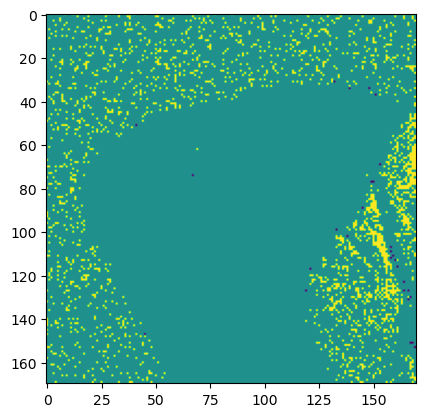

In [93]:
x0, x1 = (10, 180) # Shaves from top & bottom
y0, y1 = (50, 220) # Shaves from left and right

with open('test.bin', 'rb') as f:
    img = np.load(f)

print(f"{x1 - x0} x {y1 - y0} image")
plt.imshow(img[x0:x1, y0:y1])

In [29]:
sample = train_a.iloc[starts[0]:starts[1]]
img = hf.sample_2_image(sample, meta)

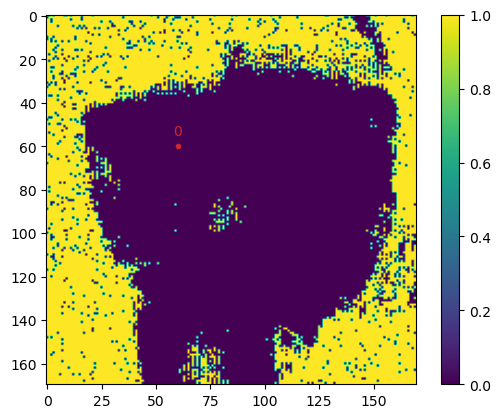

In [51]:
shift = 40 # shift y
x, y = 60, 60 # Point

fig = plt.figure()
im = plt.imshow(img[x0:x1, y0-shift:y1-shift])
plt.scatter(x, y, marker='.', color="tab:red")
plt.text(x=x-2, y=y-5, s=f"{img[x, y]}", color="tab:red")
cbar = fig.colorbar(im)

In [35]:
# 0 values are events

0